## RAISIN: KECIMEN Y BESNI

<p align="center">
  <font face="Arial Narrow" size="4" color="#3c3c3c"> 
  Henry Carmona Collazos - 2185965 &nbsp&nbsp&nbsp&nbsp&nbsp&nbsp Daniel Alejandro Tobar - 2185884
  </font>
<p>
<p align="center">
  <font face="Arial Narrow" size="4" color="#3c3c3c"> 
  Brahyan C. Marulanda - 2185962 &nbsp&nbsp&nbsp&nbsp&nbsp Diego Ivan Perea M.       - 2185751
  </font>
<p>

### IMPORTACIÓN LIBRERIAS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from keras.utils import np_utils

### PREPROCESAMIENTO DE LOS DATOS

#### SE CARGAN LOS DATOS DEL XLSX

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Redes Neuronales/ENTREGABLE SEM9-10/Raisin_Dataset.xlsx")
print(data.shape)
data.head(10)

(900, 8)


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
5,49242,318.125407,200.122120,0.777351,51368,0.658456,881.836,Kecimen
6,42492,310.146072,176.131449,0.823099,43904,0.665894,823.796,Kecimen
7,60952,332.455472,235.429835,0.706058,62329,0.743598,933.366,Kecimen
8,42256,323.189607,172.575926,0.845499,44743,0.698031,849.728,Kecimen
9,64380,366.964842,227.771615,0.784056,66125,0.664376,981.544,Kecimen


In [ ]:
data.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [ ]:
data.columns = ['area', 'majoraxislength', 'minoraxislength', 'eccentricity', 'convexarea', 'extent', 'perimeter', 'class']
data.head()

,area,majoraxislength,minoraxislength,eccentricity,convexarea,extent,perimeter,class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


#### SE VERIFICA SI EXISTEN VALORES NULOS

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             900 non-null    int64  
 1   majoraxislength  900 non-null    float64
 2   minoraxislength  900 non-null    float64
 3   eccentricity     900 non-null    float64
 4   convexarea       900 non-null    int64  
 5   extent           900 non-null    float64
 6   perimeter        900 non-null    float64
 7   class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [ ]:
data.isnull().sum()

area               0
majoraxislength    0
minoraxislength    0
eccentricity       0
convexarea         0
extent             0
perimeter          0
class              0
dtype: int64

#### SE ELIMINAN LOS DATOS INNECESARIOS

<p align="justify">
  <font face="Arial Narrow" size="4" color="#3c3c3c"> 
  No se elimina ningun dato, sin embargo, si se modifica el valor de las clases a 0 y 1, debido a que anteriormente eran String
  </font>
</p>

In [ ]:
data['class'][data['class'] == 'Besni'] = 1
data['class'][data['class'] == 'Kecimen'] = 0
data['class'] = pd.to_numeric(data['class'])
print(data.dtypes)

area                 int64
majoraxislength    float64
minoraxislength    float64
eccentricity       float64
convexarea           int64
extent             float64
perimeter          float64
class                int64
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f365eb5f250>,
      dtype=object)

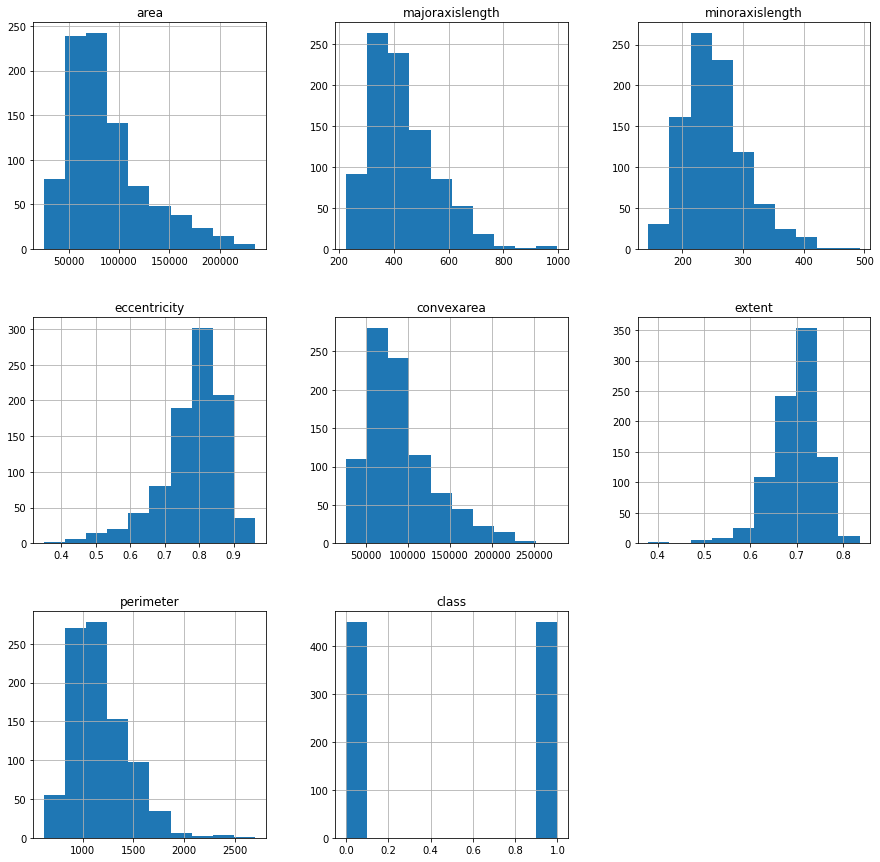

In [ ]:
data.hist(figsize=(15,15))

#### SE ABSTRAEN LOS DATOS DE ENTRENAMIENTO Y VALIDACIÓN

In [ ]:
target = data['class'].values #y_train
data3 = data.drop(['class'], axis=1)

print(target.shape)
print(data3.shape)

(900,)
(900, 7)


In [ ]:
from sklearn.model_selection import train_test_split
seed = 42

x_train,x_test,y_train,y_test = train_test_split(data3, target, test_size=0.15, random_state=seed)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(765, 7)
(765,)
(135, 7)
(135,)


In [ ]:
def normalizar(x,xmax,xmin,ymax,ymin):
  m = (ymax-ymin)/(xmax-xmin)
  b = ymin - m*xmin

  y = m*x + b

  return y

In [ ]:
max = np.max(x_train).values
min = np.min(x_train).values
x_train2 = normalizar(x_train,max,min,1,-1)

max = np.max(x_test).values
min = np.min(x_test).values
x_test2 = normalizar(x_test,max,min,1,-1)

y_train2 = np_utils.to_categorical(y_train)
y_test2 = np_utils.to_categorical(y_test)

### GENERACIÓN DEL MODELO

#### ARQUITECTURA DEL MODELO

In [ ]:
input_dim = x_train.shape[1]
num_classes = y_train2.shape[1]

##### RED SUPERFICIAL

<p align="justify">
  <font face="Arial Narrow" size="4" color="#3c3c3c"> 
  La red superficial esta conformada por 1 capa de entrada, 1 capas oculta de 10 neuronas con función de activación ReLU y una capa de salida de 2 neuronas debido a que se cuenta con 2 clases y con una función de activación softmax, debido a que se tiene un problema de clasificación, es decir, que se requiere una distribucion probabilistica a la salida. De igual forma, se agrega una funcion de perdida binary_crossentropy debido a que solo se cuenta con 2 clases 1 para cuando es Besni o 0 cuando es Kecimen.
  </font>
</p>

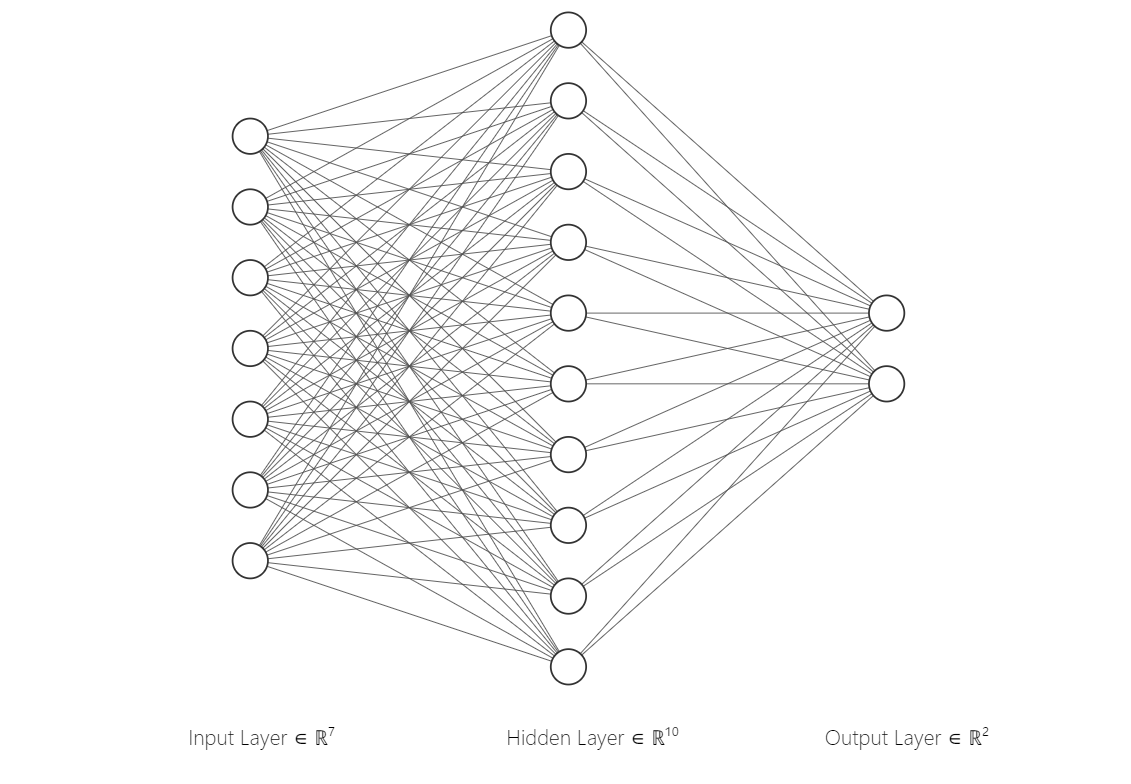

In [ ]:
def model1():
  model = Sequential()
  model.add(Dense(10, input_dim = input_dim, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  model.summary()
 
  model.compile(loss = 'binary_crossentropy', metrics=['accuracy'], optimizer = 'adam')

  return model

In [ ]:
Model1 = model1()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                80        
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
Total params: 102
Trainable params: 102
Non-trainable params: 0
_________________________________________________________________


##### RED PROFUNDA

<p align="justify">
  <font face="Arial Narrow" size="4" color="#3c3c3c"> 
  La red profunda esta conformada por 1 capa de entrada, 3 capas oculta de 64, 32 y 16 neuronas respectivamente, con función de activación ReLU para cada una y una capa de salida de 2 neuronas debido a que se cuenta con 2 clases y con una función de activación softmax. De igual forma, se agrega una funcion de perdida binary_crossentropy.
  </font>
</p>

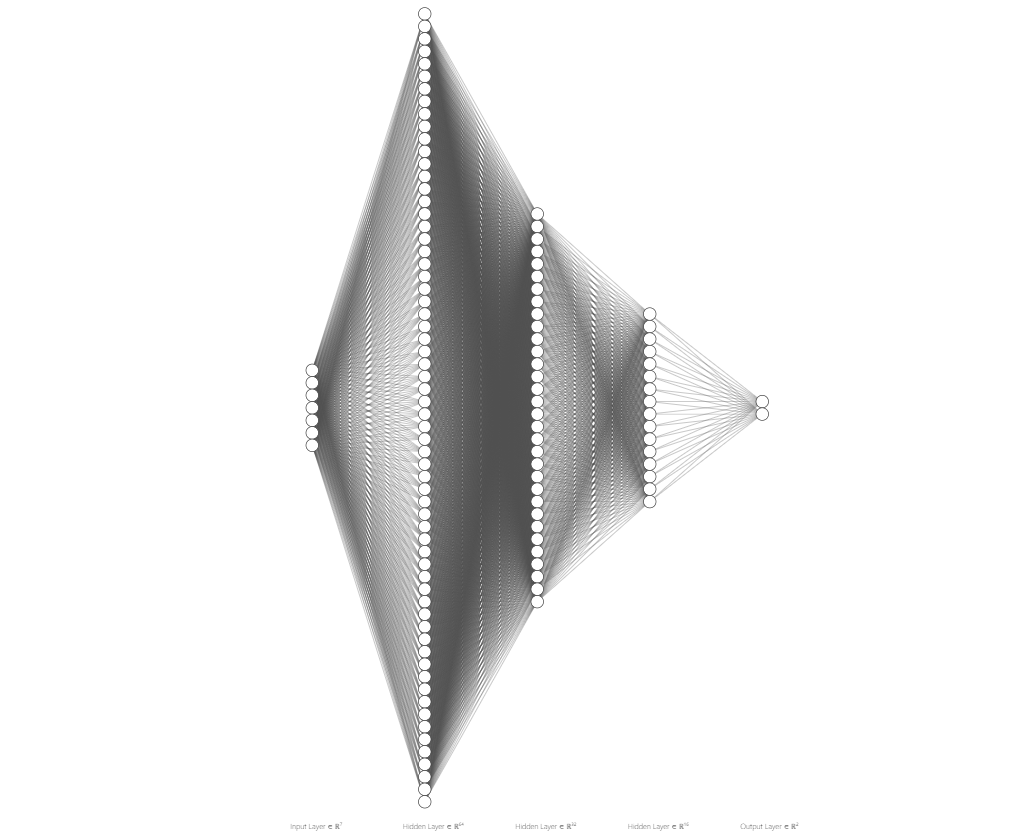

In [ ]:
def model2():
  model = Sequential()
  model.add(Dense(64, input_dim = input_dim, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  model.summary()
 
  model.compile(loss = 'binary_crossentropy', metrics=['accuracy'], optimizer = 'sgd')

  return model

In [ ]:
Model2 = model2()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                512       
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 2)                 34        
                                                                 
Total params: 3,154
Trainable params: 3,154
Non-trainable params: 0
_________________________________________________________________


#### SE ENTRENAN Y VALIDAN LOS MODELO

##### RED SUPERFICIAL

###### ENTRENAMIENTO

In [ ]:
history1 = Model1.fit(x_train2, y_train2, validation_data=(x_test2,y_test2), epochs=300, batch_size=100, verbose=0)

In [ ]:
score1 = Model1.evaluate(x_test2, y_test2, verbose=0)

print('Loss:',score1[0])
print('Accuracy:',score1[1])

Loss: 0.4904683530330658
Accuracy: 0.8148148059844971


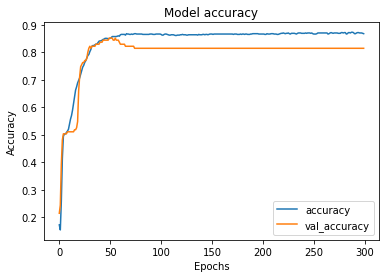

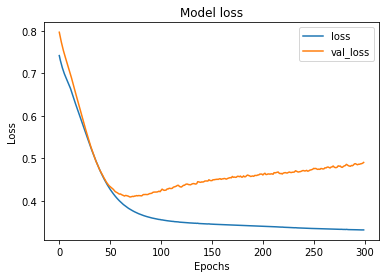

In [ ]:
plt.figure()
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label='val_accuracy')
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()



plt.figure()
plt.plot(history1.history['loss'], label='loss')
plt.plot(history1.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'upper right')
plt.show()

###### VALIDACIÓN

In [ ]:
from sklearn.metrics import confusion_matrix

outputTest1 = Model1.predict(x_test2)
print(outputTest1.shape)
print(y_test[0])
print(outputTest1[0])

(135, 2)
0
[0.00251318 0.9974868 ]


In [ ]:
cm = confusion_matrix(y_test,np.argmax(outputTest1, axis=1))
print(cm)

[[49 19]
 [ 6 61]]


In [ ]:
def plot_confusion_matrix(cm, num_classes,normalize=False,title='Matrix de Confusion',cmap=plt.cm.Blues):
      
      import itertools
      
      classes = ['KECIMEN', 'BESNI']

      plt.figure(figsize = (7,7))
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()
      tick_marks = np.arange(len(classes))
      plt.xticks(tick_marks, classes, rotation=90)
      plt.yticks(tick_marks, classes)
      if normalize:
          cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
          cm = np.round(cm,3)
      thresh = cm.max() / 2.
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, cm[i, j],
                   horizontalalignment="center",
                   color="white" if cm[i, j] > thresh else "black")
      plt.tight_layout()
      plt.ylabel('Original')
      plt.xlabel('Predicciones')

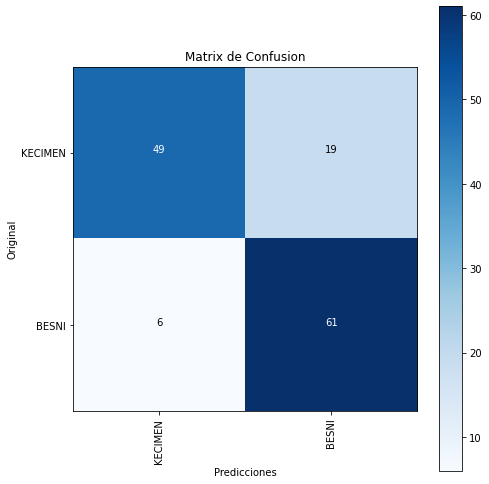

In [ ]:
plot_confusion_matrix(cm, num_classes)

##### RED PROFUNDA

###### ENTRENAMIENTO

In [ ]:
history2 = Model2.fit(x_train2, y_train2, validation_data=(x_test2,y_test2), epochs=250, batch_size=10, verbose=0)

In [ ]:
score2 = Model2.evaluate(x_test2, y_test2, verbose=0)

print('Loss:',score2[0])
print('Accuracy:',score2[1])

Loss: 0.6276059746742249
Accuracy: 0.800000011920929


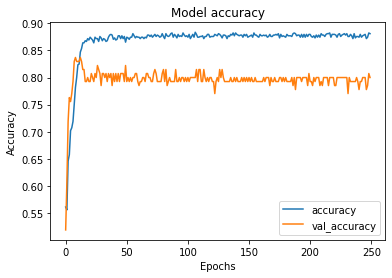

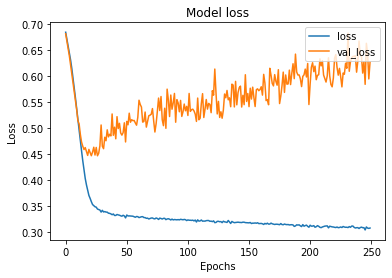

In [ ]:
plt.figure()
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label='val_accuracy')
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()



plt.figure()
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'upper right')
plt.show()

###### VALIDACIÓN

In [ ]:
from sklearn.metrics import confusion_matrix

outputTest2 = Model2.predict(x_test2)
print(outputTest2.shape)
print(y_test[0])
print(outputTest2[0])

(135, 2)
0
[3.8754634e-04 9.9961251e-01]


In [ ]:
cm1 = confusion_matrix(y_test,np.argmax(outputTest2, axis=1))
print(cm1)

[[46 22]
 [ 5 62]]


In [ ]:
def plot_confusion_matrix2(cm1, num_classes,normalize=False,title='Matrix de Confusion',cmap=plt.cm.Blues):
      
      import itertools
      
      classes = ['KECIMEN', 'BESNI']

      plt.figure(figsize = (7,7))
      plt.imshow(cm1, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()
      tick_marks = np.arange(len(classes))
      plt.xticks(tick_marks, classes, rotation=90)
      plt.yticks(tick_marks, classes)
      if normalize:
          cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]
          cm1 = np.round(cm1,3)
      thresh = cm1.max() / 2.
      for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
          plt.text(j, i, cm1[i, j],
                   horizontalalignment="center",
                   color="white" if cm1[i, j] > thresh else "black")
      plt.tight_layout()
      plt.ylabel('Original')
      plt.xlabel('Predicciones')

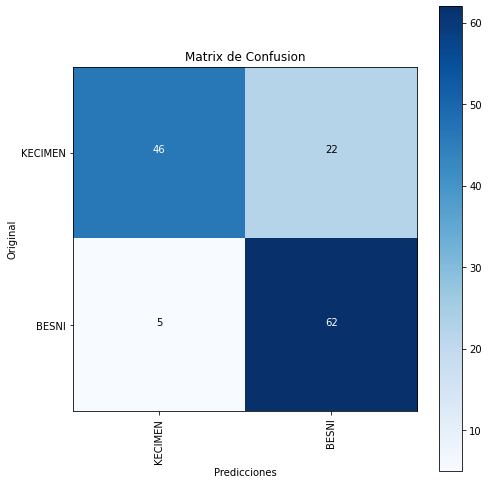

In [ ]:
plot_confusion_matrix2(cm1, num_classes)